In [2]:
import dhlab as dh
import dhlab.api.dhlab_api as api
import pandas as pd
import requests
from recursive_collocation import make_collocation_graph
import dhlab.graph_networkx_louvain as gnl

In [3]:
def make_imagination_corpus():
    """Bygg hele imagination-korpuset fra dhlab"""

    import requests
    def query_imag_corpus(category=None, author=None, title=None, year=None, publisher=None, place=None, oversatt=None):
        """Fetch data from imagination corpus"""
        params = locals()
        params = {key: params[key] for key in params if params[key] is not None}
        #print(params)
        r = requests.get(f"{dh.constants.BASE_URL}/imagination", params=params)
        return r.json()
   
    # kategoriene
    cats = [
        'Barnelitteratur',
        'Biografi / memoar',
        'Diktning: Dramatikk',
        'Diktning: Dramatikk # Diktning: oversatt',
        'Diktning: Epikk',
        'Diktning: Epikk # Diktning: oversatt',
        'Diktning: Lyrikk',
        'Diktning: Lyrikk # Diktning: oversatt',
        'Diverse',
        'Filosofi / estetikk / språk',
        'Historie / geografi',
        'Lesebok / skolebøker / pedagogikk',
        'Litteraturhistorie / litteraturkritikk',
        'Naturvitenskap / medisin',
        'Reiselitteratur',
        'Religiøse / oppbyggelige tekster',
        'Samfunn / politikk / juss',
        'Skisser / epistler / brev / essay / kåseri',
        'Taler / sanger / leilighetstekster',
        'Teknologi / håndverk / landbruk / havbruk'
    ]
   
    # bygg en dataramme for hver kategori
    a = dict()
    for c in cats:
        a[c] = dh.Corpus()
        a[c].extend_from_identifiers(query_imag_corpus(category=c))
        a[c] = a[c].frame
        a[c]['category'] = c

    # lim alt sammen til et stort korpus
    imag_all = pd.concat([a[c] for c in a])
    imag_all.year = imag_all.year.astype(int)
    imag_all.dhlabid = imag_all.dhlabid.astype(int)
   
    return imag_all

In [8]:
def imag_ngram(corpus, words):
    cnts = dh.Counts(corpus, words)
    d2y = pd.Series(corpus.set_index('dhlabid')['year'].to_dict())
    d2y.to_frame('year')
    frek = cnts.frame.transpose().copy()
    frek = pd.concat([frek, d2y.to_frame('year')], axis = 1)
    return frek.groupby('year').sum()

In [5]:
%%time
corpus = make_imagination_corpus()

In [29]:
epikk = corpus.loc[corpus.category.str.contains('Epikk')]

In [31]:
epikk.loc[epikk.authors.str.contains('Skram , Amalie')]

,urn,dhlabid,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,ocr_timestamp,category
492,URN:NBN:no-nb_digibok_2009021603021,100617263,På Sct. Jørgen,"Skram , Amalie",oai:nb.bibsys.no:998720222854702202,47123f58059bff0bb25698d0accc600e,,Kjøbenhavn,18950101.0,1895,Gyldendal,nob,,,novel,Skjønnlitteratur,digibok,dhlab,20221201.0,Diktning: Epikk
649,URN:NBN:no-nb_digibok_2009042312002,100617879,Sommer : smaa fortællinger,"Skram , Amalie",oai:nb.bibsys.no:999214849254702202,58583488095266194c46290b8f391db9,,København,18990101.0,1899,Gyldendal,nob,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
656,URN:NBN:no-nb_digibok_2009042712001,100617895,Kjærlighed i nord og syd : Noveller,"Skram , Amalie",oai:nb.bibsys.no:997521138104702202,57ba462b8cfc2b5e4d38c56452934f61,,Kjøbenhavn,18910101.0,1891,Schubothes Forl.,nob,,,short story,Skjønnlitteratur,digibok,dhlab,20221201.0,Diktning: Epikk
668,URN:NBN:no-nb_digibok_2009042810003,100617924,S.G. Myre : roman,"Skram , Amalie",oai:nb.bibsys.no:999609014854702202,58adf541ce3a94d12e883cc44f17b3ba,,Kjøbenhavn,18900101.0,1890,Schubothes Boghandel,nob,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
685,URN:NBN:no-nb_digibok_2009050412001,100617961,Forraadt,"Skram , Amalie",oai:nb.bibsys.no:999615881604702202,4cdd47ef898d30e098447f5fddff02fd,,Kjøbenhavn,18920101.0,1892,Schubothes Boghandel,nob,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
731,URN:NBN:no-nb_digibok_2009051310002,100618112,Afkom : roman,"Skram , Amalie",oai:nb.bibsys.no:999513239624702202,400ac0ee9c13b6be8a0d8c3216a27646,,København,18980101.0,1898,Gyldendal,nob,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
1177,URN:NBN:no-nb_digibok_2011072220005,100620248,Julehelg : fortælling,"Skram , Amalie",oai:nb.bibsys.no:997521365854702202,51d667d6a81d3981e7583a626705fc0f,,Kjøbenhavn,19000101.0,1900,Gyldendal,nob,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
1358,URN:NBN:no-nb_digibok_2011110908115,100620594,Mennesker : ufuldendt roman,"Skram , Amalie / Levin , Poul",oai:nb.bibsys.no:997521368364702202,13d02258e42bd34ebbb39c743ac5dfc7,,København ; Kristiania,19050101.0,1905,Gyldendal,nob,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
1465,URN:NBN:no-nb_digibok_2012022824024,100620844,Lucie,"Skram , Amalie",oai:nb.bibsys.no:999609014344702202,a9d724b2afab0e34aaa58dec8bfcb231,,Kjøbenhavn,18880101.0,1888,Schubothes boghandel,dan,,,,Uklassifisert,digibok,dhlab,20221201.0,Diktning: Epikk
1795,URN:NBN:no-nb_digibok_2013082608001,100622436,Constance Ring : roman,"Skram , Amalie",oai:nb.bibsys.no:990122294154702202,c5747c914bcd0f89282bf10d58837d84,,Kristiania,18850101.0,1885,Huseby,nob,,,novel,Skjønnlitteratur,digibok,dhlab,20221201.0,Diktning: Epikk


In [43]:
%%time
trend = imag_ngram(epikk.loc[epikk.authors.str.contains('Skram , Amalie')], ['Døren','Dør','Gatedøren','Sofa', 'Sofaen'])

CPU times: user 37.3 ms, sys: 4.19 ms, total: 41.5 ms
Wall time: 1.57 s


In [47]:
trend.sum(axis = 1)

year
1885    109.0
1888      1.0
1890      8.0
1891     87.0
1892     81.0
1895     11.0
1898     15.0
1899      1.0
1900      2.0
1905    475.0
dtype: float64

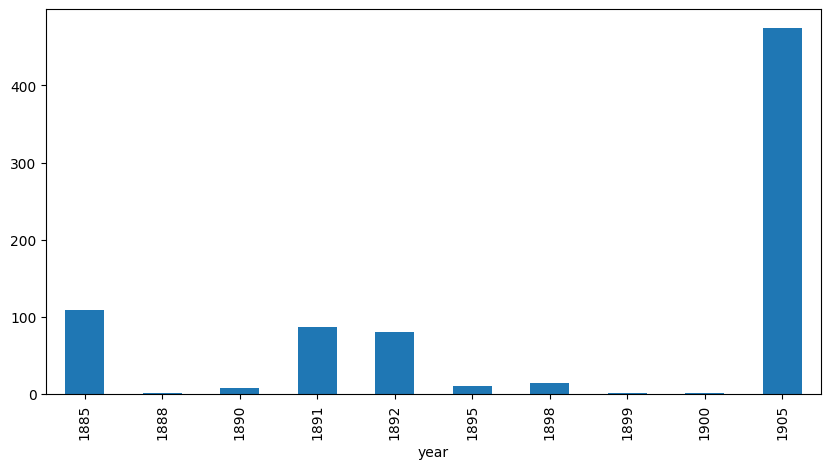

In [48]:
trend.sum(axis=1).plot(kind = 'bar', lw=5,figsize=(10,5));